In [1]:
#current goals:
#test on wmt, unbiased sampling, 

In [2]:
loss_file="/Users/lukecadigan/thesis/fairseq/outputs/default_train.out"


# example_str="INFO | valid | epoch 100 | valid on 'valid' subset | loss 3.971 | nll_loss 2.427 | ppl 5.38 | bleu 34.71 | wps 6575.3 | wpb 2874.4 | bsz 117.4 | num_updates 110100 | best_bleu 35.43"
import re
# pattern=r"* \| INFO \| valid \| epoch * \| valid on 'valid' subset \| *"
line_pattern=r"INFO \| valid \| epoch (\d+) \| valid on 'valid' subset \| loss"
all_metrics=[]
with open(loss_file, 'r') as file:
    for idx, line in enumerate(file):
        if(re.findall(line_pattern,line )):            
            # print(line)
            pattern = r'(\b[a-zA-Z_]+\b)\s+([\d.]+)'
            matches = re.findall(pattern, line)
            
            metrics = dict(matches)


            for k, v in metrics.items():
                if '.' in v:
                    metrics[k] = float(v)
                else:
                    metrics[k] = int(v)

            all_metrics.append(metrics)

print(len(all_metrics))



100


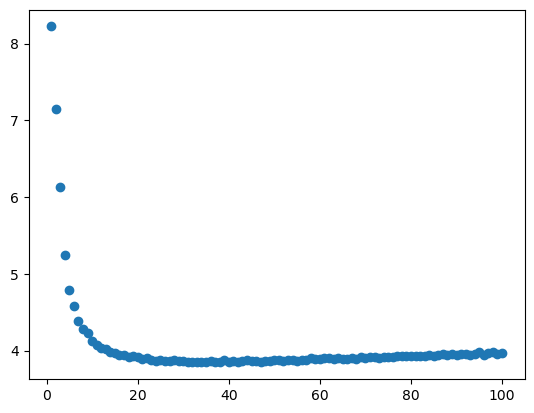

In [3]:
import matplotlib.pyplot as plt
x=[metrics["epoch"] for metrics in all_metrics]
y=[metrics["loss"] for metrics in all_metrics]
plt.scatter(x,y)





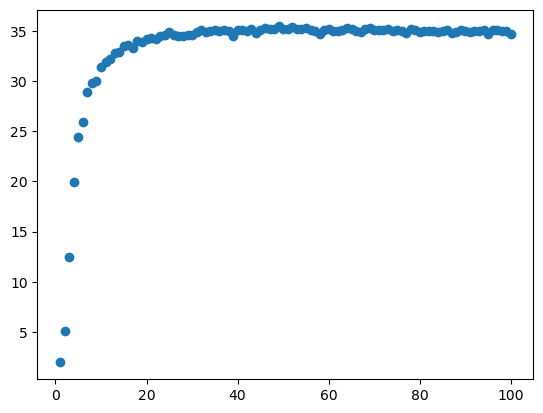

In [4]:
x=[metrics["epoch"] for metrics in all_metrics]
y=[metrics["bleu"] for metrics in all_metrics]
plt.scatter(x,y)